# Budget Analysis

---

## Environment Setup

In [1]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
# Set environment variables from the .env file

load_dotenv()

True

In [4]:
# Extract API keys from environment variables

PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SECRET")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
# Create the client object

client = plaid.Client(client_id=PLAID_CLIENT_ID, 
                      public_key=PLAID_PUBLIC_KEY, 
                      secret=PLAID_SECRET, 
                      environment = 'sandbox')

In [6]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [7]:
# Create the public token

create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

# Print the public token

create_tkn_response

{'public_token': 'public-sandbox-e7f54cfd-a99b-4fcb-b320-a4fc26fbb8f7',
 'request_id': 'EdwQ0yruXNYLIKJ'}

### 3. Exchange the public token for an access token

In [8]:
# Retrieve the access token

exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
# access_token = exchange_response['access_token']

# Print the access token
print(exchange_response)

{'access_token': 'access-sandbox-a80a0d37-9257-4427-a0fa-0ded8138abf4', 'item_id': 'gqm9rbMnoZUra754e931FGMoNaL8pAcgqjmR4', 'request_id': 'i1VqgEE4j5q0YNr'}


In [9]:
# Store the access token in a Python variable

access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [10]:
# Retrieve accounts

accounts =client.Accounts.get(access_token)

# Print accounts

accounts

{'accounts': [{'account_id': '7k9qJpRZo3FbZDk7Eq3Nsa4rnzprmBHgLoZQl',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'enmEqvMALQhQyZBdjWebFrk3pva375FL14gDD',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'Qy3BeJpxlgUZdRLA5WKGi3ro8BnovxspE51oX',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [11]:
# Set the start and end date 90 days from today

start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 

# Retrieve the transactions for the last 90 days

transactions_response = client.Transactions.get(access_token, start_date, end_date)

# Print the transactions

transactions_response['transactions'][:1]

[{'account_id': 'ZRm7xqEQaDHW16dAKb8JFdPLvVALrztgV63LB',
  'account_owner': None,
  'amount': 500,
  'authorized_date': None,
  'category': ['Travel', 'Airlines and Aviation Services'],
  'category_id': '22001000',
  'date': '2020-07-29',
  'iso_currency_code': 'USD',
  'location': {'address': None,
   'city': None,
   'country': None,
   'lat': None,
   'lon': None,
   'postal_code': None,
   'region': None,
   'store_number': None},
  'merchant_name': 'United Airlines',
  'name': 'United Airlines',
  'payment_channel': 'in store',
  'payment_meta': {'by_order_of': None,
   'payee': None,
   'payer': None,
   'payment_method': None,
   'payment_processor': None,
   'ppd_id': None,
   'reason': None,
   'reference_number': None},
  'pending': False,
  'pending_transaction_id': None,
  'transaction_code': None,
  'transaction_id': '8X9KxpJMgVIoR1KGdXpQibgJ9QMoAXfwjbn66',
  'transaction_type': 'special',
  'unofficial_currency_code': None}]

### 2. Print the categories for each transaction

In [12]:
# Create a for-loop to print the categories for each transaction

for transactions in transactions_response['transactions']:
     print(json.dumps(transactions['category']))

["Travel", "Airlines and Aviation Services"]
["Travel", "Taxi"]
["Food and Drink", "Restaurants"]
["Payment"]
["Food and Drink", "Restaurants", "Fast Food"]
["Shops", "Sporting Goods"]
["Payment", "Credit Card"]
["Travel", "Taxi"]
["Transfer", "Debit"]
["Transfer", "Deposit"]
["Recreation", "Gyms and Fitness Centers"]
["Travel", "Airlines and Aviation Services"]
["Food and Drink", "Restaurants", "Fast Food"]
["Food and Drink", "Restaurants", "Coffee Shop"]
["Food and Drink", "Restaurants"]
["Transfer", "Credit"]
["Travel", "Airlines and Aviation Services"]
["Travel", "Taxi"]
["Food and Drink", "Restaurants"]
["Payment"]
["Food and Drink", "Restaurants", "Fast Food"]
["Shops", "Sporting Goods"]
["Payment", "Credit Card"]
["Travel", "Taxi"]
["Transfer", "Debit"]
["Transfer", "Deposit"]
["Recreation", "Gyms and Fitness Centers"]
["Travel", "Airlines and Aviation Services"]
["Food and Drink", "Restaurants", "Fast Food"]
["Food and Drink", "Restaurants", "Coffee Shop"]
["Food and Drink", "R

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [13]:
# Define an empty DataFrame and set the columns as date, name, amount, and category

transaction_df = pd.DataFrame(columns=["date", "name", "amount", "category"])

# Retrieve all the transactions

transactions = transactions_response["transactions"]

# Populate the transactions DataFrame with the transactions data

for index, transaction in enumerate(transactions):
    transaction_df.loc[index]=[transaction["date"],transaction["name"], transaction["amount"], transaction["category"][0]]
    
# Display sample data from the DataFrame    

transaction_df.head()

,date,name,amount,category
0,2020-07-29,United Airlines,500,Travel
1,2020-07-27,Uber 072515 SF**POOL**,6.33,Travel
2,2020-07-24,Tectra Inc,500,Food and Drink
3,2020-07-23,AUTOMATIC PAYMENT - THANK,2078.5,Payment
4,2020-07-23,KFC,500,Food and Drink


In [16]:
### 4. Convert the data types to the appropriate types 

### (i.e. datetimeindex for the date and float for the amount)

transaction_df['amount'] = transaction_df['amount'].astype(float)

#### datetime index set above

# Display data types

transaction_df.dtypes

date         object
name         object
amount      float64
category     object
dtype: object

In [17]:
# Set the date column as index

# Display sample data

transaction_df = transaction_df.set_index("date")
transaction_df.head()

,name,amount,category
date,,,
2020-07-29,United Airlines,500.00,Travel
2020-07-27,Uber 072515 SF**POOL**,6.33,Travel
2020-07-24,Tectra Inc,500.00,Food and Drink
2020-07-23,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-07-23,KFC,500.00,Food and Drink


# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [18]:
# Fetch the income data

income = client.Income.get(access_token)

# Print the income data

income

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'y6jdFTrxOe5L7HM'}

In [19]:
# Determine the previous year's gross income and print the results

income['income']['last_year_income_before_tax']

7285

In [20]:
# Determine the current monthly income and print the results

income['income']['income_streams'][0]['monthly_income']

500

In [21]:
# Determine the projected yearly income and print the results

income['income']['projected_yearly_income']

6085

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [22]:
# Compute the total expenses per category

expenses = transaction_df.groupby('category').sum()

# Display the expenses per category

expenses

,amount
category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,535.19


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f83f2fb8650>],
      dtype=object)

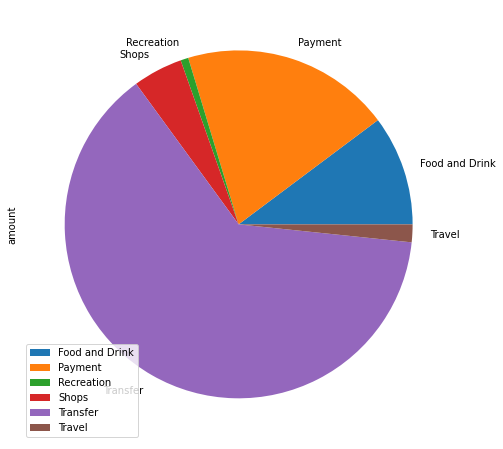

In [23]:
# Create a spending categories pie chart.

expenses.plot.pie(subplots = True, figsize = (16,8), legend = True)

### Calculate the expenses per month

In [24]:
# Create a DataFrame with the total expenses

transaction_df['month'] = pd.to_datetime(transaction_df.index).month

# Display sample data

transaction_df.head()

,name,amount,category,month
date,,,,
2020-07-29,United Airlines,500.00,Travel,7
2020-07-27,Uber 072515 SF**POOL**,6.33,Travel,7
2020-07-24,Tectra Inc,500.00,Food and Drink,7
2020-07-23,AUTOMATIC PAYMENT - THANK,2078.50,Payment,7
2020-07-23,KFC,500.00,Food and Drink,7


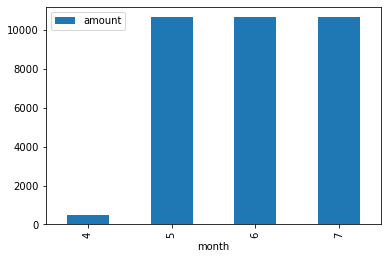

In [25]:
# Create a spending per month bar chart

expenses_bar = transaction_df.reset_index().groupby('month').sum()
expenses_bar.plot.bar()